# bdpy.fig examples

In [1]:
from bdpy.fig import makefigure, box_off, draw_footnote, tile_images

from glob import glob

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

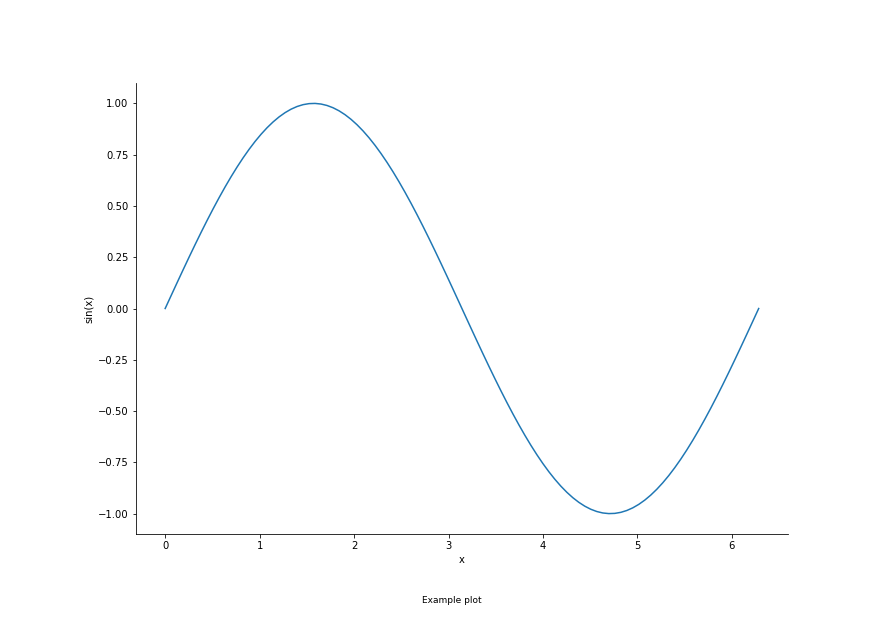

In [2]:
# makefigure: creates a matplotlib figure object with specified paper size
# box_off: removes uppper and right axis lines
# draw_footnote: draw footnote text in a figure

x = np.linspace(0, 2* np.pi, 100)
y = np.sin(x)

fig = makefigure('a4landscape') # or `makefigure('a4portrait')`


plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('sin(x)')

box_off(fig.gca())

draw_footnote(fig, 'Example plot')

In [3]:
# tile_images: create tiled images.

help(tile_images)

Help on function tile_images in module bdpy.fig.tile_images:

tile_images(images, ncols=None, columned=False, labels=None, fig=None, wspace=0, hspace=0.1, horizontal_margin=0.05, vertical_margin=0.05, label_position='inside', label_fontsize=12, label_color='black')
    Create tiled images.
    
    Parameters
    ----------
    images : list
        List of image files. This can be either
        - List of images.
        - List of lists of images.
    ncols : int
        The number of columns. Default is num of images (i.e., images will be
        tiled in a single row).
    columned : bool
        If `True`, images from different groups are aligned in a column.
        If `False` (default), images are tiled separatedly by groups.
    labels : list
        Labels of image groups. If `None` (default), do not draw label text.
    fig : matplotlib.figure.Figure
        If `None` (default), create the image on `matplotlib.pyplot.gcf()`.
    wspace, hspace : float
    horizontal_margin, ve

In [4]:
# Prepare demo images (R, G, and B versions of MNIST)

import PIL
import sklearn.datasets

mnist = sklearn.datasets.fetch_mldata('MNIST original', data_home='./data/mnist')

if not os.path.exists('./data/mnist/images'):
    os.makedirs('./data/mnist/images')

n_images = 12

for i in range(n_images):
    orig = mnist.data[i, :].reshape((28, 28))
    
    red = np.stack([orig, np.zeros_like(orig), np.zeros_like(orig)], axis=2)
    green = np.stack([np.zeros_like(orig), orig, np.zeros_like(orig)], axis=2)
    blue = np.stack([np.zeros_like(orig), np.zeros_like(orig), orig], axis=2)

    img_red = PIL.Image.fromarray(red.astype(np.uint8))
    img_green = PIL.Image.fromarray(green.astype(np.uint8))
    img_blue = PIL.Image.fromarray(blue.astype(np.uint8))

    img_red.save('./data/mnist/images/red-%04d.tiff' % i)
    img_green.save('./data/mnist/images/green-%04d.tiff' % i)
    img_blue.save('./data/mnist/images/blue-%04d.tiff' % i)

/home/kujaku/libraries/python/anaconda2-2018.12/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/home/kujaku/libraries/python/anaconda2-2018.12/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


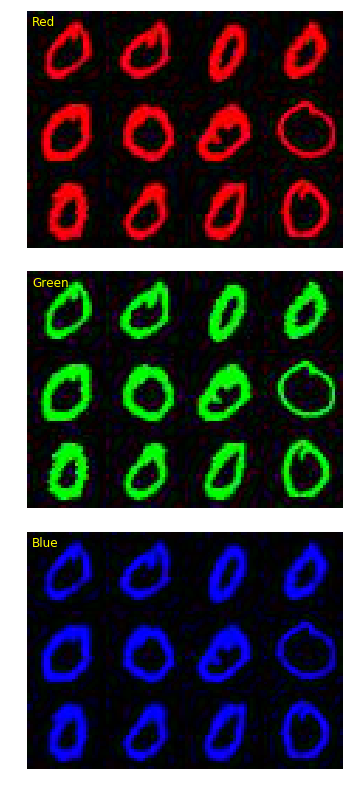

In [5]:
mnist_red = sorted(glob('./data/mnist/images/red-*.jpg'))
mnist_green = sorted(glob('./data/mnist/images/green-*.jpg'))
mnist_blue = sorted(glob('./data/mnist/images/blue-*.jpg'))

fig = makefigure('a4portrait')
tile_images([mnist_red, mnist_green, mnist_blue],
            labels=['Red', 'Green', 'Blue'],
            label_color='yellow', label_fontsize=12,
            ncols=4)
fig.savefig('./figures/example_tile_images_default.pdf', dpi=300)

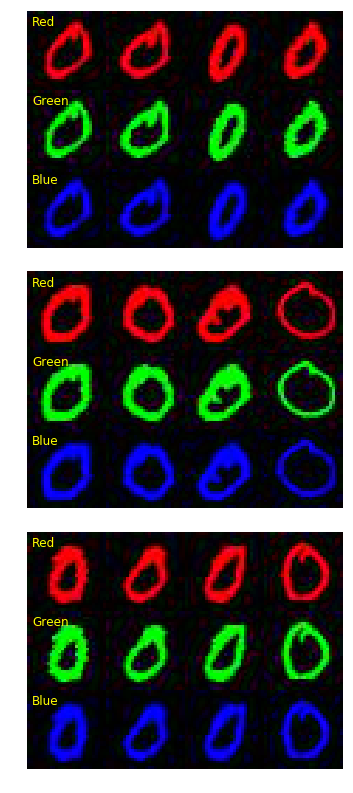

In [6]:
# 'columned' mode: images from different groups are aligned in a column.
# Suitable for comparison of images amoung different groups.

fig = makefigure('a4portrait')
tile_images([mnist_red, mnist_green, mnist_blue],
            labels=['Red', 'Green', 'Blue'],
            label_color='yellow', label_fontsize=12,
            columned=True,
            ncols=4)
fig.savefig('./figures/example_tile_images_columned.pdf', dpi=300)